<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/update/99.%20Final%20Project/Modeling%20Clean%20-%20Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Prediction
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

**Context**
- The telco customer churn data contains customer information from a fictional telco company
- This company provides various services such as streaming, phone, and internet services
<br><br>

**Problem Background**
- Customer churn is one of the biggest problems in the telecommunications industry
- By definition, customer churn is when customers stop interacting (subscribe) with the company
- Companies need to invest (expense costs) to get new customers
- When a customer leaves the service (churns), it indicates a loss of investment
- Cost, time, and effort need to be channelled to replace customers who have left the service
- Acquiring new customers is often more difficult and more expensive than retaining existing customers
- On Hardvard Business Review [page](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers), they said: acquiring a new customer is anywhere from five to 25 times more expensive than retaining an existing one
<br><br>

**Objectives**
- Predict whether customers will continue to use the service or will leave the service
- Understand the customer behaviors: what keeps customers using the service and what makes them leave the service
<br><br>

**Contents**
1. Dataset Information
2. Importing Libraries
3. Dataset Overview
4. Dataset Overview - Function
5. Exploratory Data Analysis
6. Data Preprocessing

# 1. Dataset Information
This dataset comes from Kaggle, you can find it here: [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn).
<br><br>
This dataset is used to predict behavior to retain customers. Each row represents a customer, and each column contains customer's attribute.
<br><br>
**Attribute Information**
- Identifier
  - `customerID` - ID number of the customer

- Target Variable
  - `Churn` - Churn status, whether the customer churned or not

- Demographic information
  - `gender` - Whether the customer is a male or a female
  - `SeniorCitizen` - Whether the customer is a senior citizen or not
  - `Partner` - Whether the customer has a partner or not
  - `Dependents` - Whether the customer has dependents or not

- Customer account information
  - `tenure` - Number of months the customer has used the service
  - `Contract` - The contract term of the customer
  - `PaperlessBilling` - Whether the customer has paperless billing or not
  - `PaymentMethod` - The customer’s payment method
  - `MonthlyCharges` - The amount charged to the customer monthly
  - `TotalCharges` - The total amount charged to the customer
  
- Services that each customer has signed up for
  - `PhoneService` - Whether the customer has a phone service or not
  - `MultipleLines` - Whether the customer has multiple lines or not
  - `InternetService` - Customer’s internet service provider
  - `OnlineSecurity` - Whether the customer has online security or not
  - `OnlineBackup` - Whether the customer has online backup or not
  - `DeviceProtection` - Whether the customer has device protection or not
  - `TechSupport` - Whether the customer has tech support or not
  - `StreamingTV` - Whether the customer has streaming TV or not
  - `StreamingMovies` - Whether the customer has streaming movies or not
<br><br>

**Note:** Since this dataset is using `CamelCase` format for the column names, for this project, I will convert it to `snake_case` format.

- kalo di dunia kerja, konten dari dashboard/ report itu dari kita sendiri (BI/ DA) atau di-request oleh pihak lain? misal dari orang bisnis.

- BI tools kan cukup mahal, itu nanti pasti disediain oleh perusahaan kan mas? kalo iya, berarti nanti BI/ DA harus pakai perangkat dari kantor(?)

# 2. Importing Libraries

In [ ]:
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
# !pip install xgboost
# !pip install lightgbm
!pip install catboost

!pip install inflection
!pip install dython
!pip install shap

# !pip install bayesian-optimization
# from bayes_opt import BayesianOptimization

In [ ]:
# association between attributes
from dython.nominal import associations

# basic
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
# I change the maximum width in characters of a column (default: 50)
pd.set_option('display.max_colwidth', None)

# explainable AI
import shap

# CamelCase to snake_case format
import inflection

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# pipeline
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import set_config

import joblib

# 3. Pipeline

## Basic Preparation

In [ ]:
def get_camel_case(data):
  # renaming column
  column_list = list(data.columns)

  for i, col in enumerate(column_list):
    column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

  return column_list

In [ ]:
path = 'https://raw.githubusercontent.com/adhang/datasets/main/telco-customer-churn.csv'

data = pd.read_csv(path)

# renaming column
column_list = get_camel_case(data)
data.columns = column_list
data.drop('customer_id', axis=1, inplace=True)

# rename value
data['senior_citizen'].replace({0:'No', 1:'Yes'}, inplace=True)
data.replace({'No phone service':'No',
            'No internet service':'No'},
            inplace=True)

# fill missing values
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')
data['total_charges'].fillna(0, inplace=True)
data['total_charges'] = data['total_charges'].astype(float)

## Train-Test Split

In [ ]:
data_X = data.drop('churn', axis=1)
data_y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3,
                                                    random_state=1, stratify=data_y)

## Label Encoding

In [ ]:
le = LabelEncoder()

le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

## Pipeline

In [ ]:
# from tempfile import mkdtemp
# from shutil import rmtree
# # make the cache directory
# cachedir = mkdtemp()
# # remove the cache directory
# rmtree(cachedir)

# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
column_categorical.remove('churn')

transformer_numerical = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                        ('scaler', MinMaxScaler())])

transformer_categorical = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                          ('encoder', OneHotEncoder(sparse=False, drop='if_binary', handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('numerical', transformer_numerical, column_numerical),
                                               ('categorical', transformer_categorical, column_categorical)], remainder='passthrough')

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('smote', SMOTE(random_state=1)),
                           ('feature_selection', SelectKBest(score_func=f_classif, k=13)),
                           ('estimator', LGBMClassifier(random_state=1, num_leaves=10, n_estimators=175, learning_rate=0.01))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.909     0.752     0.823      1552
           1      0.536     0.791     0.639       561

    accuracy                          0.762      2113
   macro avg      0.722     0.772     0.731      2113
weighted avg      0.810     0.762     0.774      2113



In [ ]:
def hm_acc_recall(y_test, y_pred, beta=1, **kwargs):
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  # beta = 1

  fbeta_score = (1 + beta**2) * (accuracy*recall)/(beta*accuracy+recall)
  return fbeta_score

print(hm_acc_recall(y_test, y_pred))

0.776662470011287


In [ ]:
cv_scoring = {'acc':'accuracy',
              'rec':'recall',
              'fbeta':make_scorer(hm_acc_recall)}

# cv_scoring = {'acc':'accuracy',
#               'recall':'recall'}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=cv_scoring, cv=cv, n_jobs=-1)

for scoring in cv_scoring:
  tmp = f'test_{scoring}'
  print(f'Cross validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')

Cross validation acc	: 0.756 (0.018)
Cross validation rec	: 0.779 (0.033)
Cross validation fbeta	: 0.767 (0.022)


In [ ]:
set_config(display='diagram')
display(pipeline)

set_config(display='text')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'monthly_charges',
                                                   'total_charges']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknow...
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                                   'contract',
                                                   'paperless_billing',
                                                   'payment_method'])])),
                ('smote', SMOTE(random_state=1)),
                ('feature_selection', SelectKBest(k=13)),
                ('estimator',
                 LGBMClassifier(learning_rate=0.01, n_estimators=175,
                                num_leaves=10, random_state=1))])

# 4. Save Model

In [ ]:
path = '/content/drive/MyDrive/Digital Skola/Final Project/output/trained_model.pkl'

joblib.dump(pipeline, path)

['/content/drive/MyDrive/Digital Skola/Final Project/output/trained_model.pkl']

# 5. Load Model

In [ ]:
path = '/content/drive/MyDrive/Digital Skola/Final Project/output/trained_model.pkl'

loaded_model = joblib.load(path)

set_config(display='diagram')
display(loaded_model)

set_config(display='text')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'monthly_charges',
                                                   'total_charges']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknow...
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                                   'contract',
                                                   'paperless_billing',
                                                   'payment_method'])])),
                ('smote', SMOTE(random_state=1)),
                ('feature_selection', SelectKBest(k=13)),
                ('estimator',
                 LGBMClassifier(learning_rate=0.01, n_estimators=175,
                                num_leaves=10, random_state=1))])

# 6. Explainable AI

In [ ]:
input = X_test.iloc[0]

input_df = pd.DataFrame(input).T
input_df

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
1630,Male,Yes,Yes,No,38,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,102.6,4009.2


## Prediction

In [ ]:
y_pred = loaded_model.predict(input_df)
y_pred

array([1])

## SHAP

In [ ]:
column_list = ['tenure', 'monthly_charges', 'total_charges', 'dependents_yes',
               'internet_service_fiber_optic', 'internet_service_no',
               'online_security_yes', 'tech_support_yes',
               'contract_month_to_month', 'contract_one_year',
               'contract_two_year', 'paperless_billing_yes',
               'payment_method_electronic_check']

In [ ]:
transformer = Pipeline(steps=[('preprocessor', loaded_model.named_steps['preprocessor']),
                              ('feature_selection', loaded_model.named_steps['feature_selection'])])

In [ ]:
input_transformed = transformer.transform(input_df)
input_transformed = pd.DataFrame(input_transformed, columns=column_list)
input_transformed

,tenure,monthly_charges,total_charges,dependents_yes,internet_service_fiber_optic,internet_service_no,online_security_yes,tech_support_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_electronic_check
0,0.527778,0.839063,0.461634,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
input_numeric = input_transformed.iloc[:, :3]
inverse_numeric = transformer.named_steps['preprocessor'].transformers_[0][1].named_steps['scaler'].inverse_transform(input_numeric)
inverse_numeric

array([[  38. ,  102.6, 4009.2]])

In [ ]:
explainer = shap.Explainer(loaded_model.named_steps['estimator'])
shap_values = explainer(input_transformed)
expected_value = explainer.expected_value[1]

print(explainer.expected_value)

[0.04024755709891011, -0.04024755709891011]


In [ ]:
shap_values.base_values

array([[ 0.04024756, -0.04024756]])

In [ ]:
shap_values.values[:,:,1].flatten()

array([-0.29423629,  0.06061167, -0.0208548 ,  0.00943166,  0.2676755 ,
        0.01478274,  0.05450814,  0.02310107,  0.45339489, -0.02868916,
        0.10925357,  0.05180194,  0.18280552])

In [ ]:
shap_values.values = shap_values.values[:,:,1].flatten()
shap_values.base_values = shap_values.base_values[0,1]

In [ ]:
shap_values.data[0][0:3] = inverse_numeric.flatten()
shap_values.data = shap_values.data.flatten()

In [ ]:
shap_values.values.sum() + shap_values.base_values

0.8433388794029394

In [ ]:
shap_values_final = shap_values.values.sum() + shap_values.base_values

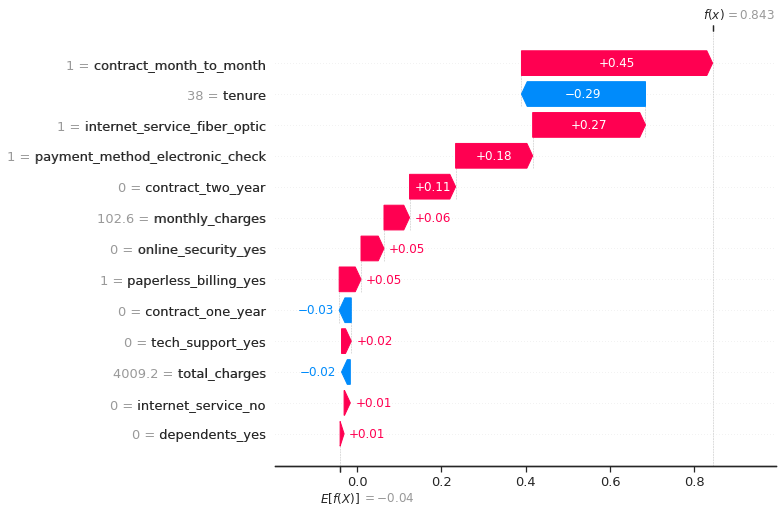

In [ ]:
shap.waterfall_plot(shap_values, max_display=20)

In [ ]:
shap.initjs()
shap.force_plot(expected_value, shap_values.values, input_transformed)

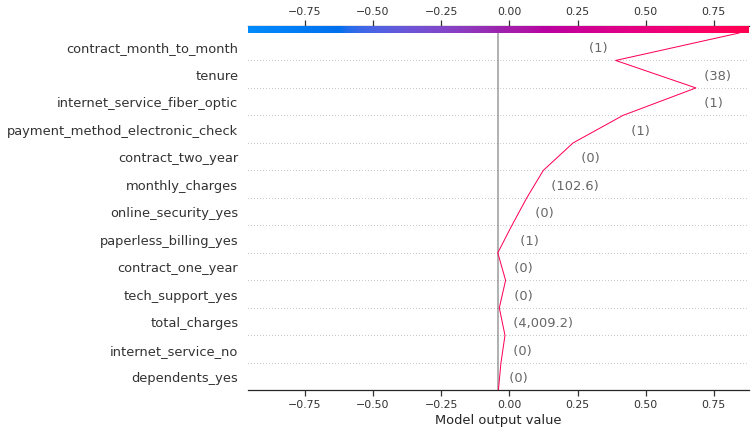

In [ ]:
shap.initjs()
shap.decision_plot(expected_value, shap_values.values, input_transformed)